# Importing Liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
datadic_path = "customer-churn-data dictionary.xlsx"
dataset_path = "customer_churn-1.csv"

dd = pd.read_excel(datadic_path, engine='openpyxl', sheet_name='Sheet1')
dd

,Column Name,Description of Column,Column Type
0,customerID,Tells the customer ID,object
1,gender,Whether the customer is a male or a female,object
2,SeniorCitizen,Whether the customer is a senior citizen or no...,int64
3,Partner,Whether the customer has a partner or not (Yes...,Object
4,Dependents,Whether the customer has dependents or not (Ye...,object
5,tenure,Number of months the customer has stayed with ...,int64
6,PhoneService,Whether the customer has a phone service or no...,object
7,MultipleLines,Whether the customer has multiple lines or not...,object
8,InternetService,"Customer’s internet service provider (DSL, Fib...",object
9,OnlineSecurity,Whether the customer has online security or no...,object


In [3]:
df = pd.read_csv(dataset_path)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### TotalCharges is object dtype but ideally it should be float64. Lets try to fix that

In [5]:
unique_values = sorted(df['TotalCharges'].unique())
print(unique_values)

[' ', '100.2', '100.25', '100.35', '100.4', '100.8', '100.9', '1001.2', '1001.5', '1003.05', '1004.35', '1004.5', '1004.75', '1005.7', '1006.9', '1007.8', '1007.9', '1008.55', '1008.7', '1009.25', '101.1', '101.45', '101.65', '101.9', '1010', '1011.05', '1011.5', '1011.8', '1012.4', '1013.05', '1013.2', '1013.35', '1013.6', '1014.25', '1016.7', '1017.35', '102.45', '102.5', '102.75', '1020.2', '1020.75', '1021.55', '1021.75', '1021.8', '1022.5', '1022.6', '1022.95', '1023.75', '1023.85', '1023.9', '1023.95', '1024', '1024.65', '1024.7', '1025.05', '1025.15', '1025.95', '1026.35', '1027.25', '1028.75', '1028.9', '1029.35', '1029.75', '1029.8', '103.7', '1031.1', '1031.4', '1031.7', '1032', '1032.05', '1033', '1033.9', '1033.95', '1035.5', '1035.7', '1036', '1036.75', '1037.75', '1039.45', '104.2', '104.3', '1041.8', '1042.65', '1043.3', '1043.35', '1043.4', '1043.8', '1045.25', '1046.1', '1046.2', '1046.5', '1047.7', '1048.45', '1048.85', '1049.05', '1049.6', '105.5', '105.6', '1050.5',

In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', None)
unique_values = df['TotalCharges'].unique()
print(unique_values)

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [7]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## A) Data Manipulation: 

#### a. Find the total number of male customers

In [8]:
maledf = df[df['gender']=='Male']
countmale = len(maledf)
print( 'Total number of male customers:', countmale)

Total number of male customers: 3555


#### b. Find the total number of customers whose Internet Service is ‘DSL’

In [9]:
DSLcustomer = df[df['InternetService']=='DSL']
countDSL = len(DSLcustomer)
print('Total number of customers whose Internet Service is DSL:',countDSL)

Total number of customers whose Internet Service is DSL: 2421


#### c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’


In [10]:
new_customer = df[(df['gender']=='Female') & (df['PaymentMethod']=='Mailed check') & (df['SeniorCitizen']==1)]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.70,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.40,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.60,No


#### d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’


In [11]:
new_customer1 = df[(df['tenure']<10) | (df['TotalCharges']<500)]
new_customer1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


## B) Data Visualization:

#### a. Build a pie-chart to show the distribution of customers would be churning out

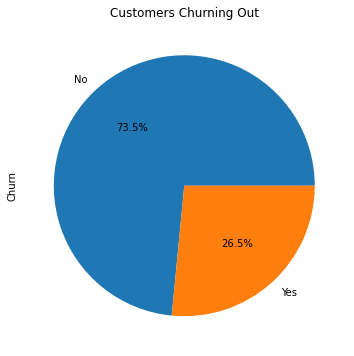

In [12]:
value_count_churn_pie = df['Churn'].value_counts()

plt.figure(figsize=(6, 6))

value_count_churn_pie.plot(kind='pie', labels=value_count_churn_pie.index, autopct='%1.1f%%')

plt.title('Customers Churning Out')
plt.show()

#### b. Build a bar-plot to show the distribution of ‘Internet Service’


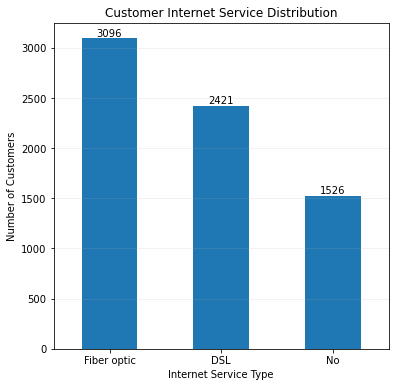

In [13]:
value_count_InternetService_Bar = df['InternetService'].value_counts()

plt.figure(figsize=(6, 6))

bars = value_count_InternetService_Bar.plot(kind='bar')

# Add count labels on top of each bar
for bar in bars.patches:
    bars.annotate(str(bar.get_height()), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

plt.grid(axis='y', linestyle='-', alpha=0.2)
plt.xticks(rotation=0)
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')

plt.title('Customer Internet Service Distribution')
plt.show()

## C) Model Building:

#### a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:

###### i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
###### ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
###### iii. Use ‘Adam’ as the optimization algorithm
###### iv. Fit the model on the train set, with number of epochs to be 150
###### v. Predict the values on the test set and build a confusion matrix
###### vi. Plot the ‘Accuracy vs Epochs’ graph


In [14]:
def convert_churn(value):
    if value == "Yes":
        return 1
    elif value == "No":
        return 0
    else:
        raise ValueError("Invalid churn value")

X1 = df['tenure']
y1 = df['Churn'].apply(convert_churn)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

y_train1 = to_categorical(y_train1)
y_test1 = to_categorical(y_test1)

In [20]:
model1 = Sequential()

model1.add(Input(shape=(1,)))
model1.add(Dense(units=12,activation="relu"))
model1.add(Dense(units=8,activation="relu"))
model1.add(Dense(units=2, activation = "sigmoid"))

model1.compile(loss="binary_crossentropy",
                 optimizer=Adam(), 
                 metrics=["accuracy"])

history1 = model1.fit(X_train1, y_train1, batch_size=500, epochs=150, validation_data=(X_test1, y_test1))

Train on 5634 samples, validate on 1409 samples
Epoch 1/150
5634/5634 [==============================] - 0s 32us/sample - loss: 0.9681 - acc: 0.4965 - val_loss: 0.6357 - val_acc: 0.4947
Epoch 2/150
5634/5634 [==============================] - 0s 11us/sample - loss: 0.5542 - acc: 0.6952 - val_loss: 0.4983 - val_acc: 0.7353
Epoch 3/150
5634/5634 [==============================] - 0s 12us/sample - loss: 0.5171 - acc: 0.7345 - val_loss: 0.5032 - val_acc: 0.7353
Epoch 4/150
5634/5634 [==============================] - 0s 8us/sample - loss: 0.5216 - acc: 0.7345 - val_loss: 0.5017 - val_acc: 0.7353
Epoch 5/150
5634/5634 [==============================] - 0s 4us/sample - loss: 0.5178 - acc: 0.7345 - val_loss: 0.4986 - val_acc: 0.7353
Epoch 6/150
5634/5634 [==============================] - 0s 4us/sample - loss: 0.5149 - acc: 0.7345 - val_loss: 0.4985 - val_acc: 0.7353
Epoch 7/150
5634/5634 [==============================] - 0s 4us/sample - loss: 0.5141 - acc: 0.7345 - val_loss: 0.4986 - val_ac

In [21]:
# Evaluate model on validation set
loss1, accuracy1 = model1.evaluate(X_test1, y_test1)
print('Final Validation Accuracy:', round(accuracy1,4), 'and Final Validation Loss:', round(loss1,4))

1409/1409 [==============================] - 0s 55us/sample - loss: 0.4990 - acc: 0.7353
Final Validation Accuracy: 0.7353 and Final Validation Loss: 0.499


In [22]:
y_pred1 = model1.predict(X_test1)

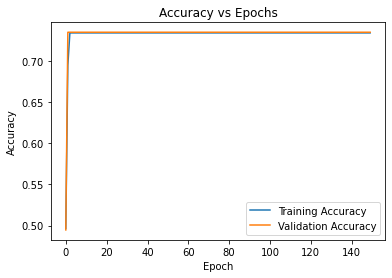

Confusion Matrix:
[[1036    0]
 [ 373    0]]


In [23]:
# Convert one-hot encoded predictions to labels
y_pred_classes1 = np.argmax(y_pred1, axis=1)

# Create confusion matrix
cm1 = confusion_matrix(y_test1.argmax(axis=1), y_pred_classes1)

# Plot accuracy vs epochs
plt.plot(history1.history['acc'], label='Training Accuracy')
plt.plot(history1.history['val_acc'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm1)

#### b. Build the 2nd model using same target and feature variables:
###### i. Add a drop-out layer after the input layer with drop-out value of 0.3
###### ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2
###### iii. Predict the values on the test set and build a confusion matrix
###### iv. Plot the ‘Accuracy vs Epochs’ graph


In [24]:
X2 = df['tenure']
y2 = df['Churn'].apply(convert_churn)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

y_train2 = to_categorical(y_train2)
y_test2 = to_categorical(y_test2)

model2 = Sequential()

model2.add(Input(shape=(1,)))
model2.add(Dense(units=12,activation="relu"))
model2.add(Dropout(0.3))
model2.add(Dense(units=8,activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(units=2, activation = "sigmoid"))

model2.compile(loss="binary_crossentropy",
                 optimizer=Adam(), 
                 metrics=["accuracy"])

history2 = model2.fit(X_train2, y_train2, batch_size=500, epochs=150, validation_data=(X_test2, y_test2))

Train on 5634 samples, validate on 1409 samples
Epoch 1/150
5634/5634 [==============================] - 0s 33us/sample - loss: 8.5856 - acc: 0.5025 - val_loss: 7.6969 - val_acc: 0.5000
Epoch 2/150
5634/5634 [==============================] - 0s 14us/sample - loss: 6.9692 - acc: 0.4976 - val_loss: 6.1619 - val_acc: 0.5000
Epoch 3/150
5634/5634 [==============================] - 0s 13us/sample - loss: 5.6390 - acc: 0.5091 - val_loss: 4.6624 - val_acc: 0.5000
Epoch 4/150
5634/5634 [==============================] - 0s 8us/sample - loss: 4.3121 - acc: 0.5205 - val_loss: 3.2663 - val_acc: 0.5000
Epoch 5/150
5634/5634 [==============================] - 0s 7us/sample - loss: 3.2735 - acc: 0.5339 - val_loss: 1.8724 - val_acc: 0.4890
Epoch 6/150
5634/5634 [==============================] - 0s 8us/sample - loss: 2.3472 - acc: 0.5697 - val_loss: 0.7663 - val_acc: 0.6742
Epoch 7/150
5634/5634 [==============================] - 0s 7us/sample - loss: 1.8247 - acc: 0.6131 - val_loss: 0.6733 - val_ac

In [25]:
# Evaluate model on validation set
loss2, accuracy2 = model2.evaluate(X_test2, y_test2)
print('Final Validation Accuracy:', round(accuracy2,4), 'and Final Validation Loss:', round(loss2,4))

1409/1409 [==============================] - 0s 79us/sample - loss: 0.5120 - acc: 0.7353
Final Validation Accuracy: 0.7353 and Final Validation Loss: 0.512


In [26]:
y_pred2 = model2.predict(X_test2)

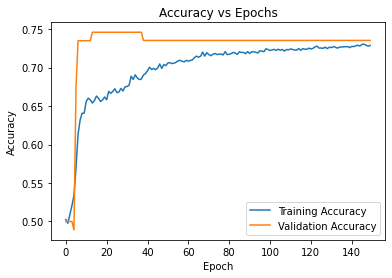

Confusion Matrix:
[[1036    0]
 [ 373    0]]


In [28]:
# Convert one-hot encoded predictions to labels
y_pred_classes2 = np.argmax(y_pred2, axis=1)

# Create confusion matrix
cm2 = confusion_matrix(y_test2.argmax(axis=1), y_pred_classes2)

# Plot accuracy vs epochs
plt.plot(history2.history['acc'], label='Training Accuracy')
plt.plot(history2.history['val_acc'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm2)

#### c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:
###### i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
###### ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
###### iii. Use ‘Adam’ as the optimization algorithm
###### iv. Fit the model on the train set, with number of epochs to be 150
###### v. Predict the values on the test set and build a confusion matrix
###### vi. Plot the ‘Accuracy vs Epochs’ graph

In [41]:
X3 = df[['tenure','MonthlyCharges','TotalCharges']]
y3 = df['Churn'].apply(convert_churn)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

y_train3 = to_categorical(y_train3)
y_test3 = to_categorical(y_test3)

model3 = Sequential()

model3.add(Input(shape=(3,)))
model3.add(Dense(units=12,activation="relu"))
model3.add(Dense(units=8,activation="relu"))
model3.add(Dense(units=2, activation = "sigmoid"))

model3.compile(loss="binary_crossentropy",
                 optimizer=Adam(), 
                 metrics=["accuracy"])

history3 = model3.fit(X_train3, y_train3, batch_size=500, epochs=150, validation_data=(X_test3, y_test3))

Train on 5634 samples, validate on 1409 samples
Epoch 1/150
5634/5634 [==============================] - 0s 31us/sample - loss: 118.9744 - acc: 0.5000 - val_loss: 95.7843 - val_acc: 0.5050
Epoch 2/150
5634/5634 [==============================] - 0s 10us/sample - loss: 87.3428 - acc: 0.4920 - val_loss: 66.0372 - val_acc: 0.4890
Epoch 3/150
5634/5634 [==============================] - 0s 10us/sample - loss: 56.8674 - acc: 0.4898 - val_loss: 36.4673 - val_acc: 0.4908
Epoch 4/150
5634/5634 [==============================] - 0s 8us/sample - loss: 35.1155 - acc: 0.6910 - val_loss: 29.4562 - val_acc: 0.7353
Epoch 5/150
5634/5634 [==============================] - 0s 9us/sample - loss: 30.1251 - acc: 0.7345 - val_loss: 24.7462 - val_acc: 0.7353
Epoch 6/150
5634/5634 [==============================] - 0s 9us/sample - loss: 25.0100 - acc: 0.7345 - val_loss: 20.2463 - val_acc: 0.7353
Epoch 7/150
5634/5634 [==============================] - 0s 8us/sample - loss: 20.3011 - acc: 0.7345 - val_loss: 1

In [42]:
# Evaluate model on validation set
loss3, accuracy3 = model3.evaluate(X_test3, y_test3)
print('Final Validation Accuracy:', round(accuracy3,4), 'and Final Validation Loss:', round(loss3,4))

1409/1409 [==============================] - 0s 53us/sample - loss: 0.5804 - acc: 0.7353
Final Validation Accuracy: 0.7353 and Final Validation Loss: 0.5804


In [43]:
y_pred3 = model3.predict(X_test3)

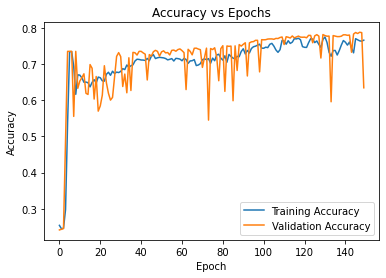

Confusion Matrix:
[[592 444]
 [ 68 305]]


In [40]:
# Convert one-hot encoded predictions to labels
y_pred_classes3 = np.argmax(y_pred3, axis=1)

# Create confusion matrix
cm3 = confusion_matrix(y_test3.argmax(axis=1), y_pred_classes3)

# Plot accuracy vs epochs
plt.plot(history3.history['acc'], label='Training Accuracy')
plt.plot(history3.history['val_acc'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm3)